# Class 2

Note:  The notes that follow are largely those of Mark Krumholz (ANU) who led the Bootcamp
last in 2015.  You can find the 2015 lectures [here](https://sites.google.com/a/ucsc.edu/krumholz/teaching-and-courses/python-15)

In [1]:
# These are to display images in-line
from IPython.display import Image
from IPython.core.display import HTML

#Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Defining Functions
## The basics

Thus far what we've done in python has been very simple, short tasks. To be useful, though, programs often need to be much longer. Moreover, such programs often involve tasks that must be done repetitively, or there are tasks that we want to perform that are common to many programs. We've already encountered an example of the latter: the sin function. There are many, many reasons why one might want to take the sin of something, so it is useful to define the sin function once and for all so that any program that needs to take the sin can do so, rather than having to come up with their own approximation of the sin using the Taylor expansion or something like that.

The capability that we are seeking is provided by defining new functions. This allows us to make our own functions that are just like the sin function, and can be called in a similar way. Functions are defined by the following syntax:

```python
def myfunc(arg1, arg2):
    print("I am a function! Here are my arguments:")
    print(arg1)
    print(arg2)
    print("I am returning my first argument now!")
    return(arg1)
```

This defines a very simple function. Let's walk through this declaration step by step:

1. The first line begins with def, then the name of the function, and then in parentheses a list of arguments for the function, then a colon. Arguments are inputs to the function. For example, the sin function takes an angle as an argument. In this example our function has two arguments. The number of arguments is arbitrary, and can be zero, in which case the parentheses are just left empty. It is also possible to write functions where the number of arguments is variable, and need not be the same every time the function is called, but we won't discuss that capability further in this short course.

2. After the define line, we begin the body of the function. Note that all the lines in the function body are indented. This indentation is IMPORTANT. In python, indentation is used to indicate that a particular line belongs to a particular function, loop, or other block of code. All the lines of the function are indented four spaces. If you're using entering this manually in ipython, either at the command line or in the notebook, you don't need to type in those four spaces by hand; the ipython shell will automatically enter them for you after seeing the def line. If you're using emacs as a text editor, you can just hit the tab key and the correct number of spaces will be entered for you.

3. Within the body of the function, we can enter whatever commands we like. We can print things, for example. The arguments in that appeared in parentheses in the definition are accessible within the function, and can be manipulated however we like.

4. At the end of the function, we have a statement that begins return. A return function causes the function to give back a value, which the calling program can print, assign to a variable, or do something else with. For example the sin function returns the sin of the input angle. Return values are optional: functions don't have to return anything, and can just end.

OK, with that in mind, let's try defining this function, first at the command line in python (reminder: start up with ipython --pylab)  or the ipython notebook (reminder: start up with ipython notebook):


In [2]:
def myfunc(arg1, arg2):
    print("I am a function! Here are my arguments:")
    print(arg1)
    print(arg2)
    print("I am returning my first argument now!")
    return(arg1)

When we enter that, nothing is printed out, but python now knows about this function. To demonstrate this, let's try calling it:


In [3]:
myfunc(1, 2)

I am a function! Here are my arguments:
1
2
I am returning my first argument now!


1

So we have run our function. We can call it with any arguments we want. The arguments can be of any type we want as well.

## Functions, modules, and importing

We just entered a function at the command line. This is helpful in that it lets us use the function any time we want without having to type in every single command more than once. We still have to type in all the commands once, however. Even more useful is the ability to write a function once, in a file, and then never have to type it again. Python provides this capability through what are called modules. A module is just a file that defines functions, and perhaps other things (for example variables). Modules files must end with the extension .py. Let's write our function into a module. To do so, fire up emacs or another text editor of your choice, and open a file called mymodule.py. Then let's type our function into it:

```python
# I am a module!
def myfunc(arg1, arg2):
    print("I am a function in a module! Here are my arguments:")
    print(arg1)
    print(arg2)
    print("I am returning my first argument now!")
    return(arg1)
```

Note the comment at the start. It is always good to add a comment about your module, what it does, when it was created, etc.

Once we've saved that file, how do we get it into python? We use a command we've already encountered: import. The import command tells python to read a module file and learn all the definitions in it. Let's try this in our interactive session:


In [4]:
import mymodule

mymodule.myfunc(1, 2)

I am a function in a module! Here are my arguments:
1
2
I am returning my first argument now!


1

Here the import command told python to read the module and learn all the functions in it. Then we can call a function. The only difference between this and when we defined the function by hand in the session is that we needed to precede the function name by the name of the module it came from, followed by a period. This is to avoid conflicts where two modules happen to have a function of the same name. If this is too much typing, yu can use a short version of the module name by assigning a new name when you import it:

In [5]:
import mymodule as mm

mm.myfunc(1, 2)

I am a function in a module! Here are my arguments:
1
2
I am returning my first argument now!


1

Modules can define more than one function, and can also define variables. Let's go back to our text editor and modify the mymodule.py file as follows:

```python
# I am a module!

# Here's a variable
about_pi = 3.14

# Here's the definition of myfunc
def myfunc(arg1, arg2):
    print("I am a function in a module! Here are my arguments:")
    print(arg1)
    print(arg2)
    print("I am returning my first argument now!")
    return(arg1)

# Here's another function
def myfunc1(arg1):
    print("I only take one argument. It is:")
    print(arg1)
    print("I also don't return anything. Bye!")
```

Now let's import the modified module. The import statement by default doesn't do anything if a module has already been imported, for reasons of efficiency: different parts of a program may all import the same module, and it would be inefficient to import it again if it has already been imported once. However, we can explicitly tell python to override this default behavior using the command reload, but we need to import the **imp** module before:


In [6]:
import imp

imp.reload(mm)
mm.about_pi

3.14

In [7]:
mm.myfunc1(3)

I only take one argument. It is:
3
I also don't return anything. Bye!


The reload command brought in the new function myfunc1, and also the variable about_pi. Note that, when we called myfunc1, nothing was printed as output beyond the print statements in the function itself. This is because it didn't have a return value.

## Optional and default arguments

The functions we have defined have to be called with the right number of arguments, where "right" means "however many arguments the function says it wants". Let's see what happens if we fail to do this:


In [8]:
mm.myfunc(1)

TypeError: myfunc() missing 1 required positional argument: 'arg2'

We get an error message. Sometimes, however, it is convenient to have arguments that are optional. They can be set if a user wants, but they don't have to be. We define optional arguments (sometimes also called keyword arguments) by giving them names and assigning default values in the argument list. Here's an example. Let's add the following to our mymodule.py file:

```python
# Yet another function
def myfunc2(arg1, arg2='cheese', arg3='sandwich'):
    print("I take one mandatory argument, and two optional ones.")
    print("The mandatory argument is:")
    print(arg1)
    print("The optional arguments are:")
    print(arg2)
    print(arg3)
```

In this definition, the argument arg1 is required, and is not given a default value. In contrast, the arguments arg2 and arg3 are optional, and are given defaults. If this function is called without arg2 or arg3 being set, they will be assigned to the default value indicated.

Let's reload the module again so that we import this new definition, then experiment with this new capability:

In [9]:
imp.reload(mm)
mm.myfunc2(1)

I take one mandatory argument, and two optional ones.
The mandatory argument is:
1
The optional arguments are:
cheese
sandwich


In [10]:
mm.myfunc2(1, arg3='burger')

I take one mandatory argument, and two optional ones.
The mandatory argument is:
1
The optional arguments are:
cheese
burger


In [11]:
 mm.myfunc2(1, arg2='ham')

I take one mandatory argument, and two optional ones.
The mandatory argument is:
1
The optional arguments are:
ham
sandwich


In [12]:
 mm.myfunc2(1, 'peanut butter')

I take one mandatory argument, and two optional ones.
The mandatory argument is:
1
The optional arguments are:
peanut butter
sandwich


Here we see that optional arguments can be handled several ways when calling a function. First, we can just give the mandatory argument and skip the optional ones, in which case they get their default values. Second, we can call specify one or more of the optional arguments by name, and use the equal sign to specify the value we want it to have. Third, we can give more than just the mandatory number of arguments, but not specify names. In this case, the first extra argument (beyond the mandatory ones) is assumed to correspond to the the first optional argument, the second extra argument to the second optional one, etc.

In some cases we want an argument to be option and NOT to have a default value. If it is not set, we want nothing to be assigned. Fortunately, python provides a way to do this. Variables can be set to the special value None, which indicates that the variable has not been assigned to anything. We can always make the default value be None, for example

```python
def mfunc2(arg1, arg2='cheese', arg3=None):
 ```

# Control Flow

## The if statement and comparison operators

Now that we know how to define new functions and import them, we're in a position to do some useful programming. However, we need a few more tools. One tool we need the ability to decide what to do based on the input we get. To demonstrate this capability, let's define new module. We'll put it in a file called plottrig.py. Let's enter the following:

```python
# This module plots user-specified trig functions

# Import all the definitions from the numpy and plotting libraries
import numpy as np
import matplotlib.pyplot as plt

# Define the plotting function
def makeplot(funcname):

    # Define the x array
    x = np.arange(0, 2*np.pi, 0.01)

    # Check if the user entered the sin, cos, or tan function
    if funcname=='sin':
        plt.plot(x, np.sin(x))
    elif funcname=='cos':
        plt.plot(x, np.cos(x))
    elif funcname=='tan':
        plt.plot(x, np.tan(x))
    else:
        print("Unrecognized function "+str(funcname))
```

Let's examine this module to understand what it does. First, we import the numpy ( as **np** ) and matplotlib.pyplot ( as **plt** ) libraries so that we can use arrays, make plots, etc. Note that we have to import these libraries within the module EVEN IF they have already been imported in our main ipython session. Definitions and import statements are specific to the module where they are called, and functions that are defined or imported into the main session (or the main program, if we're running non-interactively) do not affect other modules, and vice-versa: something that is imported into a given module will not also be imported into the main session.

Next, we define a function that takes one argument. This argument is the name of the trig function we are going to plot.

Third, we define an array that goes from 0 to 2 pi with a spacing of 0.01. This is exactly as we did in the last class.

Finally, we decide what to do based on the user input, using an if statement. The structure of if is fairly simple. We begin a line with if and then we follow that with a test that will be either true or false. In this case, we compare the input function name to 'sin' and see if it matches. The comparison is done with the == operator -- more on that in a moment. If the input funcname matches 'sin', we go ahead and plot a sin function. The line to do this is indented another 4 spaces, to indicate that this command belongs within the block to which the if applies.

If the name doesn't match 'sin', we next compare it to 'cos'. The statement that does this is 'elif', which is short for 'else if'. The meaning of 'elif' is that we first check the if statement. If it is true, we execute the block of code within that if statement. If it is false, we then go on to the 'elif' line and do that test. If that test turns out to be true, we execute that block of code. In this case, if the input value of funcname is 'cos', then we will plot a cos function. If the elif turns out to be false, we go on to the next one, that compares the input to 'tan'. If that is true, we plot tan. If not, we encounter an 'else'. The 'else' statement is the catchall: it's what we do if all the if's and elif's turn out to be false. In this case, we just print out a message complaining that we don't recognize the input function.

OK, let's test this code out:

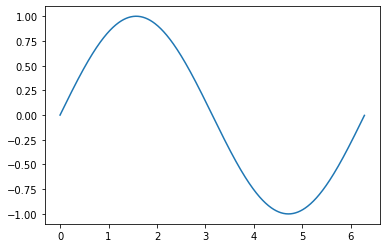

In [13]:
import plottrig as pt

pt.makeplot('sin')

Try experimenting with the other trig functions to verify that they work. If you want to clear your window, you can do so by doing


In [14]:
# Clear Figure ( clf )
plt.clf()  

<Figure size 432x288 with 0 Axes>

The thing that follows an if statement can be any statement or function that results in True or False, but it is obviously useful to be able to compare things. Python provides a number of comparison operators, but the most common ones that you will use are ==, <, >, <=, >=, and !=. Most of these have their usual mathematical meanings (for example < and >), but there are a few subtleties to be aware of. 

  - **==** tests if two things are equal; we use == rather than = because we need to distinguish comparison from assignment
  
  - **!=** means "not equal"
  
  - **<=** and **>=** mean "less than or equal to" and "greater than or equal to", respectively
  
  - when used on strings instead of numbers, < is interpreted to mean "comes before alphabetically", and similarly for >, <=, and >=

## Iteration

The next tool we want to add to our arsenal of programming tools is iteration. Iteration means performing an operation repeatedly. We can execute a very simple example at the command line. Let's make a list of objects (more on lists in a moment) as follows:

In [15]:
names=['alice', 'bob', 'charlie', 'dana']

for n in names:
    print('There are '+str(len(n))+' letters in '+n)

There are 5 letters in alice
There are 3 letters in bob
There are 7 letters in charlie
There are 4 letters in dana


This is an example of a for loop. The way a for loop works is a follows. We start with a list of objects -- in this example a list of strings, but it could be anything -- and then we say for variable in list:, followed by a block of code. The code inside the block will be executed once for every item in the list, and when it is executed the variable will be set equal to the appropriate list item. In this example, the list names had four objects in it, each a string. Thus the print statement inside the loop was executed four times. The first time it was executed, the variable n was set equal to alice. The second time n was set equal to bob, then charlie, then dana.

One of the most common types of loop is where you want to loop over numbers: 0, 1, 2, 3, .... To handle loops of this sort, python provides a simple command to construct a list of numbers to iterate over, called range. The command range(n) produces a list of numbers from 0 to n-1. For example:

In [16]:
for i in range(5):
    print(i)

0
1
2
3
4


Note that the range command has exactly the same syntax as the arange command we encountered when we constructed arrays. The difference is that arange returns an array, and range returns a list; we'll clarify the difference between those two in a few minutes.

That's really all there is to for loops. To demonstrate their utility, let's say we want to extend the capability of our trigonometric function plotting tool so that a user has the option to plot multiple trig functions with different wavelengths. To implement this, open up your plottrig.py file and add the folowing function:

```python
# Define a new plotting function
def makeplot_2(funcname, wavelength=[2*np.pi]):

    # Define the x array
    x=np.arange(0, 2*np.pi, 0.01)

    # Loop over wavelengths
    for w in wavelength:

        # Check if the user entered the sin, cos, or tan function
        if funcname=='sin':
            plt.plot(x, np.sin(x*2*np.pi/w))
        elif funcname=='cos':
            plt.plot(x, np.cos(x*2*np.pi/w))
        elif funcname=='tan':
            plt.plot(x, np.tan(x*2*np.pi/w))
        else:
            print("Unrecognized function "+str(f))
            return
```

Notice first that we've made use of our optional argument capability. The user can enter a wavelength value, but doesn't have to, because the wavelength will default to 2 pi. If the user does enter a set of wavelengths, we've used a loop to iterate over them. Let's try running this code (remembering to reload the module first, and, if you want, to clear the plot window with clf()):

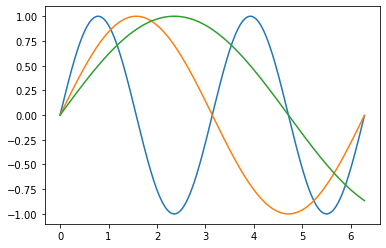

In [17]:
imp.reload(pt)

pt.makeplot_2('sin', [np.pi, 2*np.pi, 3*np.pi])

There are also other ways of iterating, which may be more convenient depending on what you're trying to do. A very common one is the while loop, which does exactly what it sounds like it should: it loops until some condition is met. For example:

In [18]:
while i < 11:
    print(i)
    i=i+3

4
7
10


The syntax is while condition:, where the condition is anything that evaluates to True or False. When you make a while statement, the condition is checked, then if it is True, the code inside the while block is executed. Then the condition is checked again. If it is still True, the code inside the block is executed again, and so forth, until the condition evaluates to False. In this example, the condition is true when i is 0, 3, 6, and 9, but then i is set to 12 and the condition is False, so the loop halts.

## Exception handling

The final control flow tool we'll play with today is exception handling. To see why we might want this capability, let's do what a user might well do when using the wavelength capability, which is to specify a single wavelength rather than a list:


In [19]:
pt.makeplot_2('sin', wavelength=2*np.pi)


TypeError: 'float' object is not iterable

We get an error message! Why? Because the code we have written wants to iterate over wavelength, but if the user enters a single number for the wavelength, as opposed to a list, that's not a list we can iterate over.

How can we handle this? We can catch this sort of error and handle it. The capability to detect and recover from errors is called exception handling. There are many ways we could use this capability to handle this situation. Let's implement one. Modify your plottrig.py file as follows:

```python

# Define the plotting function that handles exceptions
def makeplot_3(funcname, wavelength=[2*np.pi]):

    # Define the x array
    x=np.arange(0, 2*np.pi, 0.01)

    # Try to loop over wavelengths to make sure it's possible. If not,
    # turn wavelengths into a list.
    try:
        for w in wavelength:
            pass
    except TypeError:
        wavelength=[wavelength]

    # Loop over wavelengths
    for w in wavelength:

        # Check if the user entered the sin, cos, or tan function
        if funcname=='sin':
            plt.plot(x, np.sin(x*2*np.pi/w))
        elif funcname=='cos':
            plt.plot(x, np.cos(x*2*np.pi/w))
        elif funcname=='tan':
            plt.plot(x, np.tan(x*2*np.pi/w))
        else:
            print("Unrecognized function "+str(f))
            return
```


The difference between this and the last version is the bit of code

```python
    # Try to loop over wavelengths to make sure it's possible. If not,
    # turn wavelengths into a list.
    try:
        for w in wavelength:
            pass
    except TypeError:
        wavelength=[wavelength]
 ```
 
 Let's break this down into pieces. First, we have a line that says try:. The try statement is a declaration that we're about to try something that may generate an error, and, if it does, we want to decide what to do based on that error. The try statement is followed by the block of code that might generate the error. In this case, we're going to try to loop over wavelength. We won't actually do anything -- we just want to see if it's possible to perform the loop. The pass statement is a statement that does nothing. It's just a placeholder, inserted because there has to be something inside the for loop. Finally, we get to the line except TypeError:. This line ends the try block, and its purpose is to specify what we do if we get an error. The syntax is that we say except, and then we list one or more types of errors we want to handle. In this case, we want to handle TypeErrors, which arise (among other things) when we try to iterate over something that is not iterable. The final line specified what we do if we generate an error of this sort. The answer is that we turn wavelength into a list of one element, so that we can iterate over it. Then execution continues as before.

Now let's verify that this works:

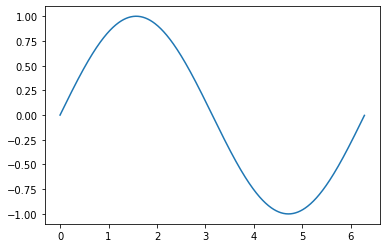

In [20]:
imp.reload(pt)

pt.makeplot_3('sin', wavelength=2*np.pi)

With luck this now runs without error, and produces a sin wave with a period of 2*pi, just as it did before we added the multi-wavelength capability.

## Intermezzo: programming challenges

We're going to go on to discuss some advanced data types now, but, as an intermezzo, here are some "do at home if you want" challenges that will help you practice the techniques we've discussed thus far. They all involve expanding your plottrig module's capabilities.

 - Make it so that users have the option to specify a phase shift and an amplitude for the trig function, as well as a wavelength. These should be implemented with optional arguments as well.

 - Allow users to specify a frequency instead of a wavelength. Since you can't simultaneously set both, the function should bail out and do nothing if a user tries to set both at once.
 
 - Allow users to modify the range plotted. Right now all our functions go from 0 to 2 pi, but we should let the user alter those numbers. We should also let the user alter the spacing between data points, instead of just using our default of 0.01.


# Advanced Data Types

## Lists

In the context of iteration, we encountered a new type of python variable: a list. Lists and 1D arrays have much in common, in that they both consist of a set of elements arranged one after another. One can be converted into the other, and they can both be indexed and sliced in the same way, i.e. the statement a[1:3] is equally valid whether a is an array or a list. However, they also have very important differences.

 - The elements in an array must all be of the same data type, while lists can be heterogenous, with different elements having different, arbitrary types. 

 - By default, arrays contain only simple data types, like numbers. (One can create arrays of more complex data types, but this requires a manual operation.) In contrast, the lists can hold arbitrarily complex data types. Indeed, lists can be nested inside one another, i.e. one can have a list, some of whose elements are also lists.

 - Unlike arrays, lists do not support broadcasting numerical operations. That is, for an array the statement array = array + 1 causes every element in the array to be increased by 1. There is no analogous statement that will increase every element of a list by 1. If one needs to do this with a list, the way to do it is to iterate over the list with a for loop and add 1 to the elements one at a time.

 - Lists provide a number of convenient methods for modifying and manipulating them (as we'll see in a moment), many of which are unavailable for arrays.

 - Conversely, there are a number of convenient methods for performing numerical computations on arrays (e.g. taking dot products, transposing them, etc.) that do not exist for lists.

 - Arrays are much more efficient than lists: operations on them are generally much faster, and they require much less memory to store.
 
In summary, for numeric operations, especially when dealing with large data sets, arrays are generally preferred. Lists are a much more general-purpose tool that is suited for general programming purposes where speed and efficient manipulation of numbers is less of a concern.

The syntax for constructing a list is one we've already encountered: simply put a bunch of elements into square brackets.



In [21]:
names2=['zadie', 'yorick', 'xander', 'wendy']

Note that one can also create empty lists, i.e. names2 = [] is a perfectly valid statement.

Once a list exists, there are a ton of tools for manipulating it, of which I'll only mention a few. For a full list, see http://docs.python.org/2/tutorial/datastructures.html. These methods allow one to add and remove list elements, find the index of a particular element in the list, check if an element is in a list, count the number of times an element occurs, and similar things. Here are some examples:


In [22]:
names2.append('victor')
names2

['zadie', 'yorick', 'xander', 'wendy', 'victor']

In [23]:
names2.insert(3, 'william')
names2

['zadie', 'yorick', 'xander', 'william', 'wendy', 'victor']

In [24]:
names2.pop(3)

'william'

In [25]:
names2

['zadie', 'yorick', 'xander', 'wendy', 'victor']

In [26]:
names2.remove('yorick')

In [27]:
names2

['zadie', 'xander', 'wendy', 'victor']

In [28]:
 names2.index('victor')

3

In [29]:
 names2.sort()

In [30]:
names2

['victor', 'wendy', 'xander', 'zadie']

In [31]:
 names2.append('wendy')

In [32]:
names2.count('wendy')

2

In [33]:
'wendy' in names2

True

In [34]:
'bob' in names2

False

One final capability I'll mention regarding lists is list comprehensions. A list comprehension is a way of constructing a new list by specifying how its elements are to be constructed from an existing list. It's easiest to understand by example, so here are two examples of list comprehensions:

In [35]:
[ x**3 for x in range(6) ]

[0, 1, 8, 27, 64, 125]

In [36]:
 [ n.upper() for n in names2 ]

['VICTOR', 'WENDY', 'XANDER', 'ZADIE', 'WENDY']

The syntax is that we give an opening bracket, then we give the rule for how to construct a given element. Then we say for, a variable name, and then in the list from which that variable name is drawn. In the first example, we use the range function to create a list of the numbers 0 - 5, and then we cube each of them to construct our new list. In the second example, we take each of the names in the names2 list, then we uppercase it using the upper command for strings.


## Tuples

Another type of complex data type is called a tuple. A tuple is somewhat like a list, in that it contains a set of elements one after another. The major difference between lists and tuples is that the elements of tuples are immutable: once created, they can't be changed. One constructs a tuple by specifying a list of elements in parentheses rather than square brackets:


In [37]:
t = (1, 2.0, 'bob', 'alice')

As you can see, tuples can be heterogenous, like lists. One can slice a tuple and access its elements just like a list or an array:


In [38]:
t[0:2]

(1, 2.0)

but one cannot change the values of items in a tuple:

In [39]:
[t0] = 0

TypeError: 'int' object is not iterable

Tuples can be unpacked into individual items:

In [40]:
a, b, c, d = t

In [41]:
a

1

In [42]:
b

2.0

In [43]:
c

'bob'

In [44]:
d

'alice'

Tuples are used most commonly to pack together the return values from a function, when the things to be returned are heterogenous and thus cannot be returned as an array. For example, later in the course we will encounter functions in scipy that can find the roots of functions. These usually return not just the root they found, but also some information about the result, for example how many iterations were required to find the root, and how accurate the result it. These are returned as a tuple of results, with one element of the tuple being the value of the root, and the other element being something more complex that describes the results.


## Dicts

The final complex data type we will discuss today is dictionaries, or dicts for short. (There is one other type, called sets, but we will not use them in this workshop.) One can think of a dict as being like a list, except that instead of the entries being numbered 0, 1, 2, ..., the entries all have names called keys that are strings, like entries in a dictionary or a phone book. Indeed, a phone book is one useful way of thinking about dicts. One constructs a dict using curly brackets, in the following syntax:


In [45]:
phonebook = { 'alice' : 5551234, 'bob' : 5555678, 'charlie' : 5559012 }

The items in quotes, before the colons, are the keys, while the items after the colons are called the values. One can see the full list of keys and values using the keys() and values() methods:


In [46]:
phonebook.keys()

dict_keys(['alice', 'bob', 'charlie'])

In [47]:
phonebook.values()

dict_values([5551234, 5555678, 5559012])

Once a dict exists, one can access its members by putting the key in square brackets, just like one puts a number in square brackets to access the elements of a list. For example:


In [48]:
phonebook['alice']

5551234

One can also modify entries in a dict just like those in a list in this way, and one can add new entries by specifying their keys and values:

In [49]:
phonebook['alice'] = 8675309
phonebook['dana'] = 5559876

One can also delete entries from a dict using the del command: 

In [50]:
del phonebook['bob']

In [51]:
phonebook

{'alice': 8675309, 'charlie': 5559012, 'dana': 5559876}